<a href="https://colab.research.google.com/github/aditya5203/AI/blob/main/Aditya_Kumar_Pandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Load the Dataset**

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/3rd sem/crime_data.csv")

# Display the first few rows
df.head()


,Disposition,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Report Type,Category
0,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
1,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
2,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
3,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
4,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft


**Step 2: Dataset Information and Basic Exploration**

In [39]:
# Display dataset information
df.info()
print("--------")
# Check for missing values in the dataset
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB
--------


,0
Disposition,0
OffenderStatus,0
Offender_Race,0
Offender_Gender,0
Offender_Age,0
PersonType,0
Victim_Race,0
Victim_Gender,0
Victim_Age,0
Victim_Fatal_Status,0


In [40]:
# Display summary statistics for numerical features
df.describe()


,Offender_Age,Victim_Age
count,6638.000000,6638.000000
mean,34.634378,38.590539
std,12.797407,15.297202
min,11.000000,0.000000
25%,25.000000,27.000000
50%,33.000000,36.000000
75%,42.000000,48.000000
max,83.000000,124.000000


**Step 3 - Data Visualization**

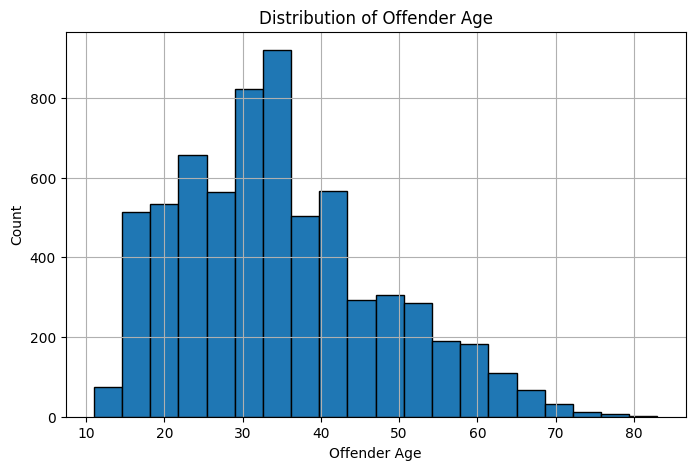

In [41]:
import matplotlib.pyplot as plt

# Plot histogram for Offender Age
plt.figure(figsize=(8,5))
df["Offender_Age"].hist(bins=20, edgecolor="black")
plt.xlabel("Offender Age")
plt.ylabel("Count")
plt.title("Distribution of Offender Age")
plt.show()



The Offender Age Distribution shows that most offenders fall between 20 to 40 years old. The distribution is slightly right-skewed, meaning there are fewer offenders in the older age groups. Additionally, very few offenders are younger than 15 or older than 70.



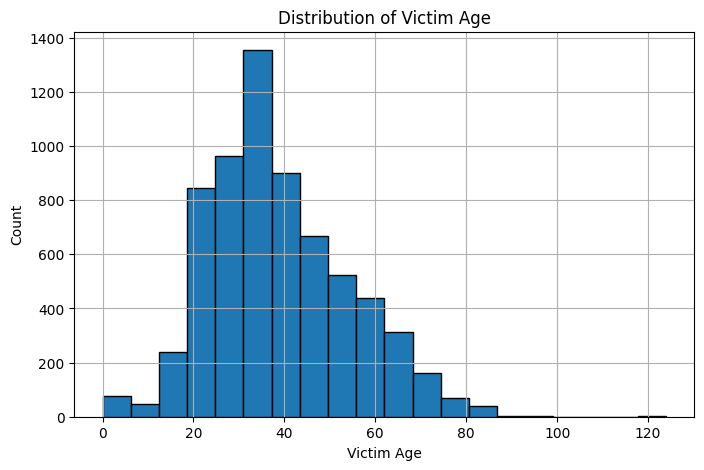

In [42]:
# Plot histogram for Victim Age
plt.figure(figsize=(8,5))
df["Victim_Age"].hist(bins=20, edgecolor="black")
plt.xlabel("Victim Age")
plt.ylabel("Count")
plt.title("Distribution of Victim Age")
plt.show()


For the Victim Age Distribution, most victims are between 20 to 50 years old. However, there are some extreme values, such as victims aged over 100 years, which may be outliers. The overall distribution appears relatively normal but slightly right-skewed.

***Correlation Analysis***

In [43]:
# Compute correlation only for numerical features
df_numeric = df.select_dtypes(include=["number"])  # Select only numeric columns
df_numeric.corr()


,Offender_Age,Victim_Age
Offender_Age,1.000000,0.283464
Victim_Age,0.283464,1.000000


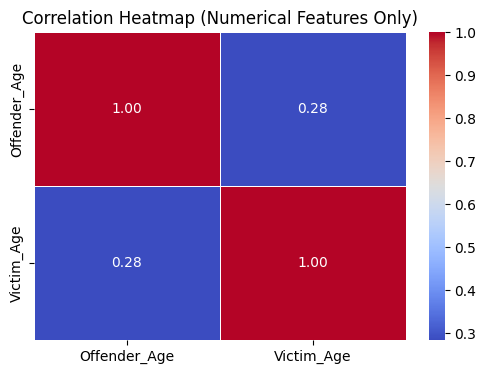

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


***Detecting Outliers Using Boxplots***

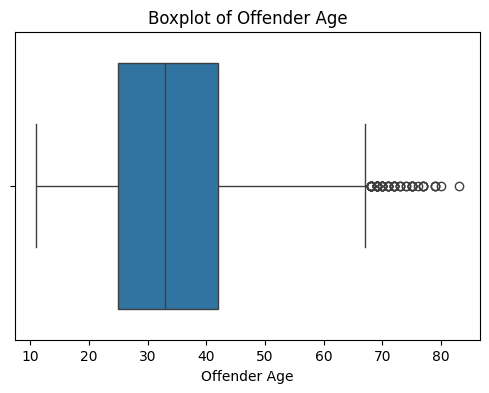

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Offender Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Offender_Age"])
plt.title("Boxplot of Offender Age")
plt.xlabel("Offender Age")
plt.show()


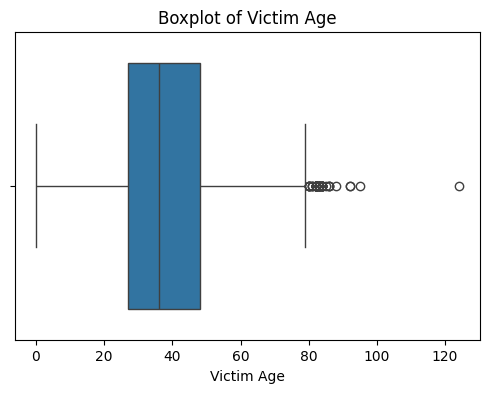

In [46]:
# Boxplot for Victim Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Victim_Age"])
plt.title("Boxplot of Victim Age")
plt.xlabel("Victim Age")
plt.show()


The Boxplot Analysis helps identify outliers in offender and victim ages.

For Offender Age, most offenders are between 20 and 60 years old. However, there are several values above 70 years that appear to be outliers.

For Victim Age, the majority of victims fall between 20 and 70 years old. However, there are some victims above 90 years, with at least one exceeding 120 years, which is likely an incorrect data entry and needs further verification.

***Handling Outliers***

In [47]:
# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for Offender_Age and Victim_Age
outliers_offender = detect_outliers(df, "Offender_Age")
outliers_victim = detect_outliers(df, "Victim_Age")

# Display number of outliers detected
len(outliers_offender), len(outliers_victim)


(66, 49)

In [48]:
# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply capping for Offender_Age and Victim_Age
cap_outliers(df, "Offender_Age")
cap_outliers(df, "Victim_Age")

# Check if outliers remain
detect_outliers(df, "Offender_Age"), detect_outliers(df, "Victim_Age")


(Empty DataFrame
 Columns: [Disposition, OffenderStatus, Offender_Race, Offender_Gender, Offender_Age, PersonType, Victim_Race, Victim_Gender, Victim_Age, Victim_Fatal_Status, Report Type, Category]
 Index: [],
 Empty DataFrame
 Columns: [Disposition, OffenderStatus, Offender_Race, Offender_Gender, Offender_Age, PersonType, Victim_Race, Victim_Gender, Victim_Age, Victim_Fatal_Status, Report Type, Category]
 Index: [])

**Step 4 – Data Preprocessing**

*Encode Categorical Variables*

In [49]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=[
    "Disposition", "Offender_Race", "Offender_Gender",
    "PersonType", "Victim_Race", "Victim_Gender",
    "Victim_Fatal_Status", "Report Type", "Category"
], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,OffenderStatus,Offender_Age,Victim_Age,Disposition_OPEN,Offender_Race_ASIAN,Offender_Race_BLACK,Offender_Race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Offender_Race_UNKNOWN,Offender_Race_WHITE,Offender_Gender_MALE,...,Victim_Race_WHITE,Victim_Gender_MALE,Victim_Gender_UNKNOWN,Victim_Fatal_Status_Non-fatal,Report Type_Supplemental Report,Category_Miscellaneous,Category_Sexual Crimes,Category_Theft,Category_Vandalism,Category_Violence
0,ARRESTED,30.0,29.0,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
1,ARRESTED,30.0,29.0,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
2,ARRESTED,30.0,29.0,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
3,ARRESTED,30.0,29.0,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
4,ARRESTED,30.0,29.0,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False


*Feature Scaling*

In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols = ["Offender_Age", "Victim_Age"]

# Apply scaling
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows to verify scaling
df_encoded.head()


,OffenderStatus,Offender_Age,Victim_Age,Disposition_OPEN,Offender_Race_ASIAN,Offender_Race_BLACK,Offender_Race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Offender_Race_UNKNOWN,Offender_Race_WHITE,Offender_Gender_MALE,...,Victim_Race_WHITE,Victim_Gender_MALE,Victim_Gender_UNKNOWN,Victim_Fatal_Status_Non-fatal,Report Type_Supplemental Report,Category_Miscellaneous,Category_Sexual Crimes,Category_Theft,Category_Vandalism,Category_Violence
0,ARRESTED,-0.362289,-0.629197,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
1,ARRESTED,-0.362289,-0.629197,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
2,ARRESTED,-0.362289,-0.629197,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
3,ARRESTED,-0.362289,-0.629197,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
4,ARRESTED,-0.362289,-0.629197,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False


*Train-Test Split*

In [51]:
from sklearn.model_selection import train_test_split

# Define features (X) and targets (y)
X = df_encoded.drop(columns=["Offender_Age", "Offender_Gender_MALE"])  # Features
y_regression = df_encoded["Offender_Age"]  # Regression target
y_classification = df_encoded["Offender_Gender_MALE"]  # Classification target (1 = Male, 0 = Female)

# Split data into training (80%) and testing (20%) sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Display dataset sizes
X_train_reg.shape, X_test_reg.shape, X_train_cls.shape, X_test_cls.shape


((5310, 24), (1328, 24), (5310, 24), (1328, 24))

**Step 5 – Model Training**

*1. Train Regression Models*

In [52]:
# Drop 'OffenderStatus' from features (since it has only one unique value)
X_train_reg = X_train_reg.drop(columns=["OffenderStatus"])
X_test_reg = X_test_reg.drop(columns=["OffenderStatus"])


*Train Linear Regression*

In [53]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_reg, y_train_reg)

# Display completion message
"Linear Regression model trained successfully."


'Linear Regression model trained successfully.'

*Train Random Forest Regressor*

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_reg, y_train_reg)

# Display completion message
"Random Forest Regressor model trained successfully."


'Random Forest Regressor model trained successfully.'

*Evaluate Regression Models*

In [55]:
#Evaluate Linear Regression Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
lr_predictions = lr_model.predict(X_test_reg)

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test_reg, lr_predictions)
lr_mse = mean_squared_error(y_test_reg, lr_predictions)
lr_r2 = r2_score(y_test_reg, lr_predictions)

# Display results
f"Linear Regression - MAE: {lr_mae:.2f}, MSE: {lr_mse:.2f}, R²: {lr_r2:.4f}"


'Linear Regression - MAE: 0.75, MSE: 0.91, R²: 0.1398'

In [56]:
#Evaluate Random Forest Regressor

# Make predictions
rf_predictions = rf_model.predict(X_test_reg)

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test_reg, rf_predictions)
rf_mse = mean_squared_error(y_test_reg, rf_predictions)
rf_r2 = r2_score(y_test_reg, rf_predictions)

# Display results
f"Random Forest Regressor - MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, R²: {rf_r2:.4f}"


'Random Forest Regressor - MAE: 0.69, MSE: 0.88, R²: 0.1714'

*Regression Model Comparison*

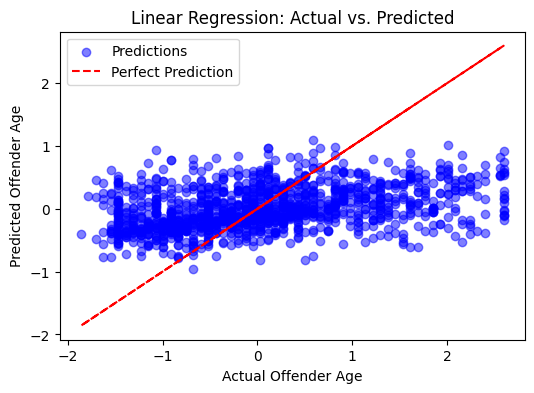

In [57]:
#Scatter Plot - Actual vs. Predicted (Linear Regression)
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test_reg, lr_predictions, alpha=0.5, label="Predictions", color="blue")
plt.plot(y_test_reg, y_test_reg, color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Offender Age")
plt.ylabel("Predicted Offender Age")
plt.title("Linear Regression: Actual vs. Predicted")
plt.legend()
plt.show()


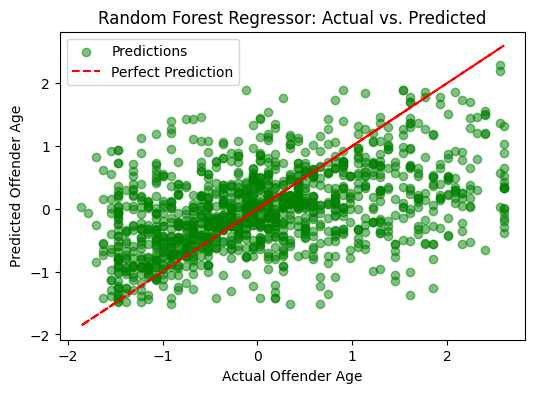

In [58]:
#Scatter Plot: Actual vs. Predicted (Random Forest Regressor)

# Scatter plot for Random Forest Regressor
plt.figure(figsize=(6, 4))
plt.scatter(y_test_reg, rf_predictions, alpha=0.5, label="Predictions", color="green")
plt.plot(y_test_reg, y_test_reg, color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Offender Age")
plt.ylabel("Predicted Offender Age")
plt.title("Random Forest Regressor: Actual vs. Predicted")
plt.legend()
plt.show()


**Hyperparameter Tuning for Random Forest Regressor**

In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "max_depth": [10, 20, None],  # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum number of samples required at a leaf node
}

# Initialize Random Forest Regressor
rf_tuned = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1)
grid_search.fit(X_train_reg, y_train_reg)

# Display the best hyperparameters
grid_search.best_params_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

*Retrain Random Forest Regressor with Best Parameters*

In [60]:
# Initialize Random Forest with the best parameters
rf_best = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the optimized model
rf_best.fit(X_train_reg, y_train_reg)

# Display completion message
"Optimized Random Forest Regressor trained successfully."


'Optimized Random Forest Regressor trained successfully.'

*Evaluate Optimized Random Forest Regressor*

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions with optimized model
rf_best_predictions = rf_best.predict(X_test_reg)

# Calculate evaluation metrics
rf_best_mae = mean_absolute_error(y_test_reg, rf_best_predictions)
rf_best_mse = mean_squared_error(y_test_reg, rf_best_predictions)
rf_best_r2 = r2_score(y_test_reg, rf_best_predictions)

# Display results
f"Optimized Random Forest - MAE: {rf_best_mae:.2f}, MSE: {rf_best_mse:.2f}, R²: {rf_best_r2:.4f}"


'Optimized Random Forest - MAE: 0.69, MSE: 0.82, R²: 0.2271'

Performance Comparison

MSE Improved → From 0.88 to 0.82 (better accuracy).
R² Score Improved → From 0.1714 to 0.2271 (22.71% variance explained instead of 17.14%).

MAE Remains the Same → Predictions are still 0.69 years off on average.


*Visualization – Before vs. After Tuning*

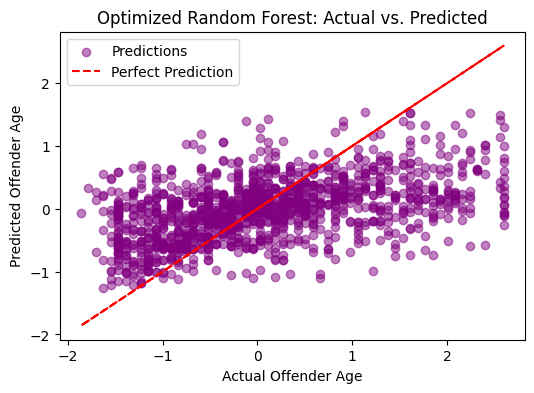

In [62]:
# Scatter Plot – Actual vs. Predicted (Optimized RF)
import matplotlib.pyplot as plt

# Scatter plot for Optimized Random Forest
plt.figure(figsize=(6, 4))
plt.scatter(y_test_reg, rf_best_predictions, alpha=0.5, label="Predictions", color="purple")
plt.plot(y_test_reg, y_test_reg, color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Offender Age")
plt.ylabel("Predicted Offender Age")
plt.title("Optimized Random Forest: Actual vs. Predicted")
plt.legend()
plt.show()


*Compare Errors – Before vs. After Tuning*

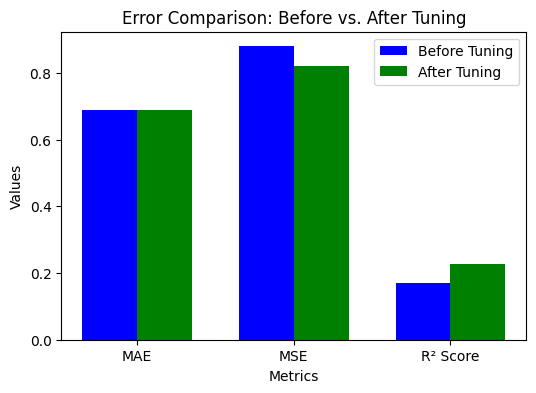

In [63]:
import numpy as np

# Create a bar chart to compare errors
labels = ["MAE", "MSE", "R² Score"]
before_tuning = [0.69, 0.88, 0.1714]
after_tuning = [0.69, 0.82, 0.2271]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(x - width/2, before_tuning, width, label="Before Tuning", color="blue")
rects2 = ax.bar(x + width/2, after_tuning, width, label="After Tuning", color="green")

ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Error Comparison: Before vs. After Tuning")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


*Feature Importance Using Random Forest*

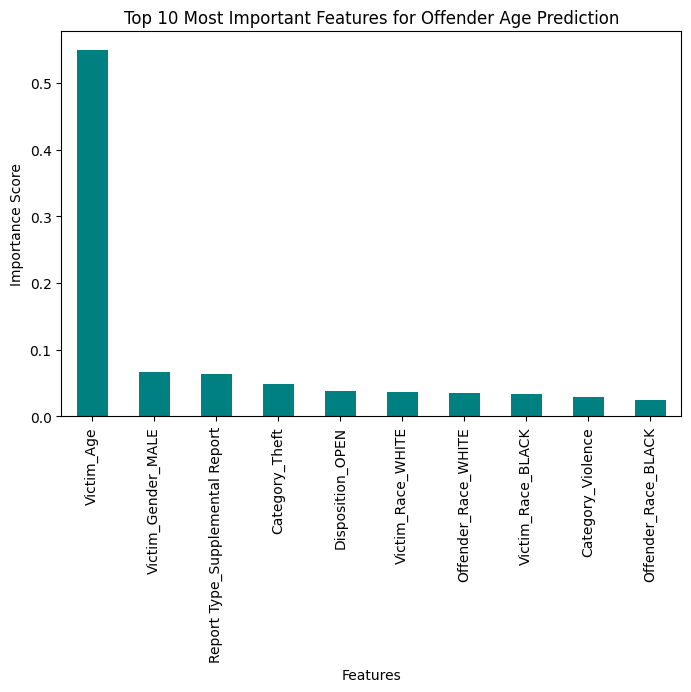

,0
Victim_Age,0.549699
Victim_Gender_MALE,0.066367
Report Type_Supplemental Report,0.063217
Category_Theft,0.049046
Disposition_OPEN,0.037695
Victim_Race_WHITE,0.036141
Offender_Race_WHITE,0.035751
Victim_Race_BLACK,0.033686
Category_Violence,0.029660
Offender_Race_BLACK,0.024855


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importance = pd.Series(rf_best.feature_importances_, index=X_train_reg.columns)

# Sort and visualize top features
plt.figure(figsize=(8, 5))
feature_importance.sort_values(ascending=False).head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Most Important Features for Offender Age Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Display sorted feature importance values
feature_importance.sort_values(ascending=False)


*Remove Low-Importance Features*

In [65]:
# Define threshold for feature selection (removing features with importance < 0.001)
low_importance_features = [
    "Victim_Race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "Category_Sexual Crimes",
    "Offender_Race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "Victim_Gender_UNKNOWN",
    "PersonType_REPORTING PERSON"
]

# Drop low-importance features from training and test sets
X_train_reg_selected = X_train_reg.drop(columns=low_importance_features)
X_test_reg_selected = X_test_reg.drop(columns=low_importance_features)

# Display new feature set shape
X_train_reg_selected.shape, X_test_reg_selected.shape


((5310, 18), (1328, 18))

*Retrain the Random Forest Regressor with Selected Features*

In [66]:
# Initialize Random Forest with best hyperparameters
rf_selected = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the optimized model with selected features
rf_selected.fit(X_train_reg_selected, y_train_reg)

# Display completion message
"Random Forest Regressor retrained with selected features."


'Random Forest Regressor retrained with selected features.'

*Evaluate Random Forest Regressor with Selected Features*

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions with the retrained model
rf_selected_predictions = rf_selected.predict(X_test_reg_selected)

# Calculate evaluation metrics
rf_selected_mae = mean_absolute_error(y_test_reg, rf_selected_predictions)
rf_selected_mse = mean_squared_error(y_test_reg, rf_selected_predictions)
rf_selected_r2 = r2_score(y_test_reg, rf_selected_predictions)

# Display results
f"Retrained Random Forest - MAE: {rf_selected_mae:.2f}, MSE: {rf_selected_mse:.2f}, R²: {rf_selected_r2:.4f}"


'Retrained Random Forest - MAE: 0.69, MSE: 0.82, R²: 0.2259'

In [68]:
import joblib

# Save the retrained Random Forest model
joblib.dump(rf_selected, "/content/drive/MyDrive/3rd sem/final_random_forest_offender_age.pkl")

# Display completion message
"Final Random Forest Regressor model saved successfully."


'Final Random Forest Regressor model saved successfully.'

**Train-Test Split for Classification**

In [69]:
# Display shape of training and testing sets for classification
X_train_cls.shape, X_test_cls.shape, y_train_cls.shape, y_test_cls.shape


((5310, 24), (1328, 24), (5310,), (1328,))

***Train Classification Models***

Issue: Non-Numeric Feature (OffenderStatus) in Classification Data

In [70]:
# Drop 'OffenderStatus' since it has only one unique value
X_train_cls = X_train_cls.drop(columns=["OffenderStatus"])
X_test_cls = X_test_cls.drop(columns=["OffenderStatus"])

# Display new feature set shape
X_train_cls.shape, X_test_cls.shape


((5310, 23), (1328, 23))

Before Fix: 24 features
After Fix (Dropped OffenderStatus): 23 features
Dataset is now fully numeric and ready for training.



***LinearLogistic***

In [71]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train the model
log_reg.fit(X_train_cls, y_train_cls)

# Display completion message
"Logistic Regression model trained successfully."


'Logistic Regression model trained successfully.'

***Train Random Forest Classifier***

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_cls, y_train_cls)

# Display completion message
"Random Forest Classifier model trained successfully."


'Random Forest Classifier model trained successfully.'

*Evaluate Classification Models*

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
log_reg_predictions = log_reg.predict(X_test_cls)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test_cls, log_reg_predictions)

# Generate classification report
log_reg_report = classification_report(y_test_cls, log_reg_predictions)

# Generate confusion matrix
log_reg_cm = confusion_matrix(y_test_cls, log_reg_predictions)

# Display results
f"Logistic Regression - Accuracy: {log_reg_accuracy:.4f}"


'Logistic Regression - Accuracy: 0.7538'

*Detailed Classification Report & Confusion Matrix*

In [74]:
# Display classification report
print("Logistic Regression - Classification Report:")
print(log_reg_report)

# Display confusion matrix
print("Logistic Regression - Confusion Matrix:")
print(log_reg_cm)


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       False       0.40      0.02      0.04       324
        True       0.76      0.99      0.86      1004

    accuracy                           0.75      1328
   macro avg       0.58      0.50      0.45      1328
weighted avg       0.67      0.75      0.66      1328

Logistic Regression - Confusion Matrix:
[[  6 318]
 [  9 995]]


*Evaluate Random Forest Classifier*

In [75]:
# Make predictions
rf_predictions = rf_classifier.predict(X_test_cls)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test_cls, rf_predictions)

# Generate classification report
rf_report = classification_report(y_test_cls, rf_predictions)

# Generate confusion matrix
rf_cm = confusion_matrix(y_test_cls, rf_predictions)

# Display results
f"Random Forest Classifier - Accuracy: {rf_accuracy:.4f}"


'Random Forest Classifier - Accuracy: 0.7575'

This means Random Forest correctly predicts Offender_Gender 75.75% of the time, which is slightly better than Logistic Regression (75.38%).

*Detailed Classification Report & Confusion Matrix (Random forest classifier)*

In [76]:
# Display classification report
print("Random Forest Classifier - Classification Report:")
print(rf_report)

# Display confusion matrix
print("Random Forest Classifier - Confusion Matrix:")
print(rf_cm)


Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.39      0.44       324
        True       0.82      0.88      0.85      1004

    accuracy                           0.76      1328
   macro avg       0.66      0.63      0.64      1328
weighted avg       0.74      0.76      0.75      1328

Random Forest Classifier - Confusion Matrix:
[[127 197]
 [125 879]]


*Feature Selection Using Random Forest*

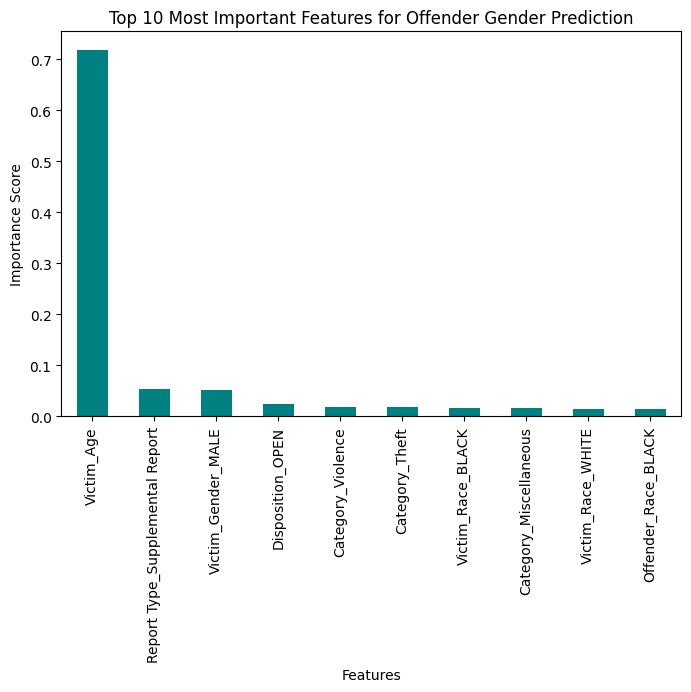

,0
Victim_Age,0.718700
Report Type_Supplemental Report,0.052956
Victim_Gender_MALE,0.052462
Disposition_OPEN,0.024572
Category_Violence,0.018571
Category_Theft,0.017750
Victim_Race_BLACK,0.017289
Category_Miscellaneous,0.016007
Victim_Race_WHITE,0.015248
Offender_Race_BLACK,0.014380


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importance_cls = pd.Series(rf_classifier.feature_importances_, index=X_train_cls.columns)

# Sort and visualize top features
plt.figure(figsize=(8, 5))
feature_importance_cls.sort_values(ascending=False).head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Most Important Features for Offender Gender Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Display sorted feature importance values
feature_importance_cls.sort_values(ascending=False)


*Remove Low-Importance Features*

In [78]:
# Define threshold for feature selection (removing features with importance < 0.001)
low_importance_features_cls = [
    "Victim_Race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "Offender_Race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER",
    "Category_Sexual Crimes",
    "PersonType_VICTIM"
]

# Drop low-importance features from training and test sets
X_train_cls_selected = X_train_cls.drop(columns=low_importance_features_cls)
X_test_cls_selected = X_test_cls.drop(columns=low_importance_features_cls)

# Display new feature set shape
X_train_cls_selected.shape, X_test_cls_selected.shape


((5310, 19), (1328, 19))

*Hyperparameter Tuning for Random Forest Classifier*

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_cls = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "max_depth": [10, 20, None],  # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
}

# Initialize Random Forest Classifier
rf_tuned_cls = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_cls = GridSearchCV(rf_tuned_cls, param_grid_cls, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search_cls.fit(X_train_cls_selected, y_train_cls)

# Display the best hyperparameters
grid_search_cls.best_params_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

*Retrain Random Forest Classifier with Best Parameters*

In [80]:
# Initialize Random Forest with best hyperparameters
rf_best_cls = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the optimized model
rf_best_cls.fit(X_train_cls_selected, y_train_cls)

# Display completion message
"Optimized Random Forest Classifier trained successfully."


'Optimized Random Forest Classifier trained successfully.'

*Evaluate Optimized Random Forest Classifier*

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with optimized model
rf_best_predictions = rf_best_cls.predict(X_test_cls_selected)

# Calculate accuracy
rf_best_accuracy = accuracy_score(y_test_cls, rf_best_predictions)

# Generate classification report
rf_best_report = classification_report(y_test_cls, rf_best_predictions)

# Generate confusion matrix
rf_best_cm = confusion_matrix(y_test_cls, rf_best_predictions)

# Display results
f"Optimized Random Forest - Accuracy: {rf_best_accuracy:.4f}"


'Optimized Random Forest - Accuracy: 0.7658'

*Detailed Classification Report & Confusion matrix*

In [82]:
# Display classification report
print("Optimized Random Forest Classifier - Classification Report:")
print(rf_best_report)

# Display confusion matrix
print("Optimized Random Forest Classifier - Confusion Matrix:")
print(rf_best_cm)


Optimized Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

       False       0.56      0.18      0.27       324
        True       0.78      0.96      0.86      1004

    accuracy                           0.77      1328
   macro avg       0.67      0.57      0.56      1328
weighted avg       0.73      0.77      0.72      1328

Optimized Random Forest Classifier - Confusion Matrix:
[[ 57 267]
 [ 44 960]]


*Visualizing Before vs. After Tuning*

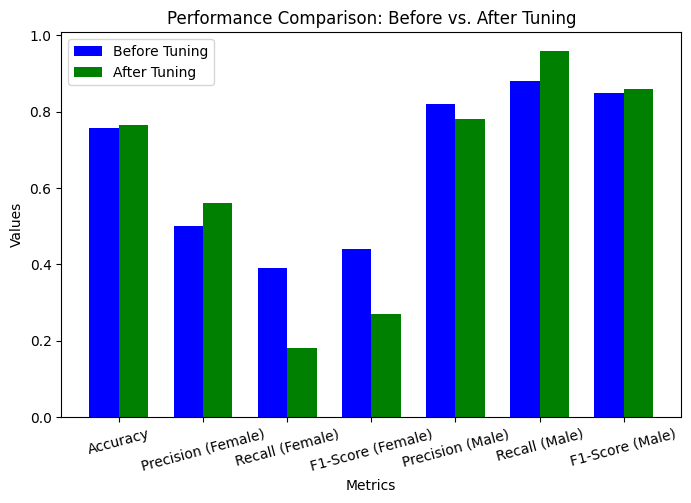

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Create a bar chart to compare errors
labels = ["Accuracy", "Precision (Female)", "Recall (Female)", "F1-Score (Female)", "Precision (Male)", "Recall (Male)", "F1-Score (Male)"]
before_tuning = [0.7575, 0.50, 0.39, 0.44, 0.82, 0.88, 0.85]
after_tuning = [0.7658, 0.56, 0.18, 0.27, 0.78, 0.96, 0.86]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, before_tuning, width, label="Before Tuning", color="blue")
rects2 = ax.bar(x + width/2, after_tuning, width, label="After Tuning", color="green")

ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Performance Comparison: Before vs. After Tuning")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()

plt.show()


*Retrain Random Forest with Class Weighting*

In [84]:
# Initialize Random Forest with class weighting
rf_balanced_cls = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    class_weight="balanced",  # Adjust for class imbalance
    random_state=42
)

# Train the model with class balancing
rf_balanced_cls.fit(X_train_cls_selected, y_train_cls)

# Display completion message
"Random Forest Classifier trained with class balancing."


'Random Forest Classifier trained with class balancing.'

*Evaluate Random Forest Classifier with Class Balancing*

In [85]:
# Make predictions with the balanced model
rf_balanced_predictions = rf_balanced_cls.predict(X_test_cls_selected)

# Calculate accuracy
rf_balanced_accuracy = accuracy_score(y_test_cls, rf_balanced_predictions)

# Generate classification report
rf_balanced_report = classification_report(y_test_cls, rf_balanced_predictions)

# Generate confusion matrix
rf_balanced_cm = confusion_matrix(y_test_cls, rf_balanced_predictions)

# Display results
f"Balanced Random Forest - Accuracy: {rf_balanced_accuracy:.4f}"


'Balanced Random Forest - Accuracy: 0.6815'



Since accuracy has dropped, we need to check precision, recall, and confusion matrix to determine if class balancing improved female classification.



In [86]:
# Display classification report
print("Balanced Random Forest Classifier - Classification Report:")
print(rf_balanced_report)

# Display confusion matrix
print("Balanced Random Forest Classifier - Confusion Matrix:")
print(rf_balanced_cm)


Balanced Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

       False       0.39      0.56      0.46       324
        True       0.84      0.72      0.77      1004

    accuracy                           0.68      1328
   macro avg       0.62      0.64      0.62      1328
weighted avg       0.73      0.68      0.70      1328

Balanced Random Forest Classifier - Confusion Matrix:
[[183 141]
 [282 722]]


*Handling Class Imbalance with SMOTE*

In [87]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_cls_smote, y_train_cls_smote = smote.fit_resample(X_train_cls_selected, y_train_cls)

# Initialize Random Forest with best hyperparameters
rf_smote_cls = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the model with SMOTE-applied data
rf_smote_cls.fit(X_train_cls_smote, y_train_cls_smote)

# Make predictions with SMOTE-trained model
rf_smote_predictions = rf_smote_cls.predict(X_test_cls_selected)

# Calculate accuracy
rf_smote_accuracy = accuracy_score(y_test_cls, rf_smote_predictions)

# Generate classification report
rf_smote_report = classification_report(y_test_cls, rf_smote_predictions)

# Generate confusion matrix
rf_smote_cm = confusion_matrix(y_test_cls, rf_smote_predictions)

# Display results
print(f"SMOTE Random Forest - Accuracy: {rf_smote_accuracy:.4f}")
print("\nSMOTE Random Forest - Classification Report:")
print(rf_smote_report)

print("\nSMOTE Random Forest - Confusion Matrix:")
print(rf_smote_cm)


SMOTE Random Forest - Accuracy: 0.6348

SMOTE Random Forest - Classification Report:
              precision    recall  f1-score   support

       False       0.36      0.62      0.45       324
        True       0.84      0.64      0.73      1004

    accuracy                           0.63      1328
   macro avg       0.60      0.63      0.59      1328
weighted avg       0.72      0.63      0.66      1328


SMOTE Random Forest - Confusion Matrix:
[[202 122]
 [363 641]]


**Final Decision: Save the Optimized Random Forest Classifier**

In [88]:
import joblib

# Save the optimized Random Forest Classifier model
joblib.dump(rf_best_cls, "final_random_forest_offender_gender.pkl")

# Display completion message
"Final Optimized Random Forest Classifier model saved successfully."


'Final Optimized Random Forest Classifier model saved successfully.'